In [56]:
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tolerance = tolerance  # Stop early if gradient updates are very small
        self.weights = None
        self.bias = 0
        self.loss_history = []  # Store MSE loss for visualization
        self.history = []  # Store weight and bias updates

    def mse(self, y, y_hat):
        error = sum((y_hat[i] - y[i]) ** 2 for i in range(len(y)))
        return error / len(y)

    def compute_y_hat(self, x):
        return sum(x[i] * self.weights[i] for i in range(len(x))) + self.bias

    def compute_gradients(self, X, y):
        n_samples = len(X)
        n_features = len(X[0])
        dw = [0] * n_features
        db = 0

        for j in range(n_samples):
            y_pred = self.compute_y_hat(X[j])
            error = y[j] - y_pred
            for i in range(n_features):
                dw[i] += error * X[j][i]
            db += error

        dw = [-(2 / n_samples) * dwi for dwi in dw]
        db *= -(2 / n_samples)

        return dw, db

    def descent(self, dw, db):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * dw[i]
        self.bias -= self.learning_rate * db

    def fit(self, X, y):
        n_features = len(X[0])
        self.weights = [0] * n_features
        prev_dw, prev_db = [float('inf')] * n_features, float('inf')  # Track previous gradients

        for epoch in range(self.epochs):
            dw, db = self.compute_gradients(X, y)

            # Simple early stopping: Check if gradient change is small
            if all(abs(dw[i] - prev_dw[i]) < self.tolerance for i in range(n_features)) and abs(db - prev_db) < self.tolerance:
                print(f'Converged at epoch {epoch}')
                break

            self.descent(dw, db)
            prev_dw, prev_db = dw, db  # Store previous gradients

            # Store weight, bias, and loss for visualization
            y_pred = self.predict(X)
            loss = self.mse(y, y_pred)
            self.loss_history.append(loss)
            self.history.append((self.weights[:], self.bias))

    def predict(self, X):
        return [self.compute_y_hat(x) for x in X]

    def visualize_training(self, X, y):
        plt.figure(figsize=(12, 5))

        # Plot loss over epochs
        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.loss_history)), self.loss_history, color='red')
        plt.xlabel("Epochs")
        plt.ylabel("MSE Loss")
        plt.title("Loss Over Iterations")

        # Plot regression line evolution
        plt.subplot(1, 2, 2)
        x_vals = [x[0] for x in X]  # Extract feature values
        plt.scatter(x_vals, y, color='blue', label='Actual Data')

        for i, (weights, b) in enumerate(self.history[::max(1, len(self.history)//10)]):
            y_vals = [weights[0] * x + b for x in x_vals]
            plt.plot(x_vals, y_vals, color='gray', alpha=0.3, linestyle='dashed')

        # Final regression line
        y_final = [self.weights[0] * x + self.bias for x in x_vals]
        plt.plot(x_vals, y_final, color='red', label='Final Fit')

        plt.xlabel("Feature Value")
        plt.ylabel("Target Value")
        plt.title("Regression Line Evolution")
        plt.legend()

        plt.show()


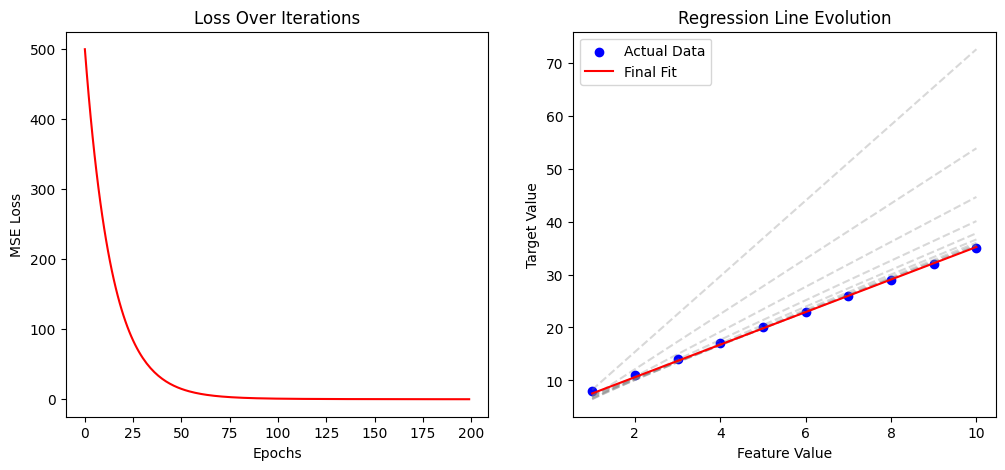

In [64]:
#1
X = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
y = [8, 11, 14, 17, 20, 23, 26, 29, 32, 35]  # y = 3x + 5
exp1=LinearRegression(learning_rate=0.025,epochs=200)
exp1.fit(X, y)
exp1.visualize_training(X, y)
#apparently 0.025 is the best learning rate and around 200 epochs is pretty good for basic lr

In [61]:
#1.2
#test train manual experimentation
X1 = [[13],[19],[-2],[115]]
exp1.predict(X1)



[44.43559826761174,
 62.887099789524825,
 -1.6931555371709992,
 358.11112414013434]

Converged at epoch 939


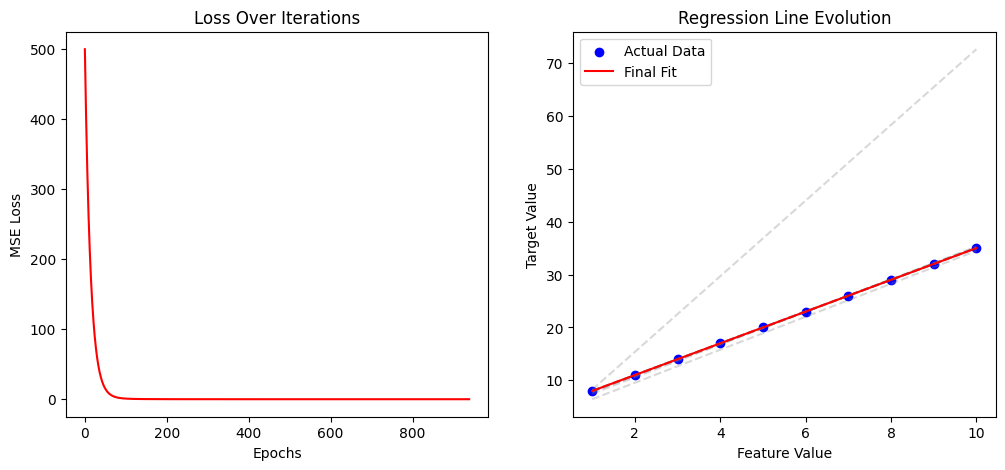

In [62]:
exp2=LinearRegression(learning_rate=0.025,epochs=1000)
exp2.fit(X, y)
exp2.visualize_training(X, y)
#pattern to see, it converges almost always at 939 when tolerance is set to 1e-6, need to experiment with different datasets

Converged at epoch 367


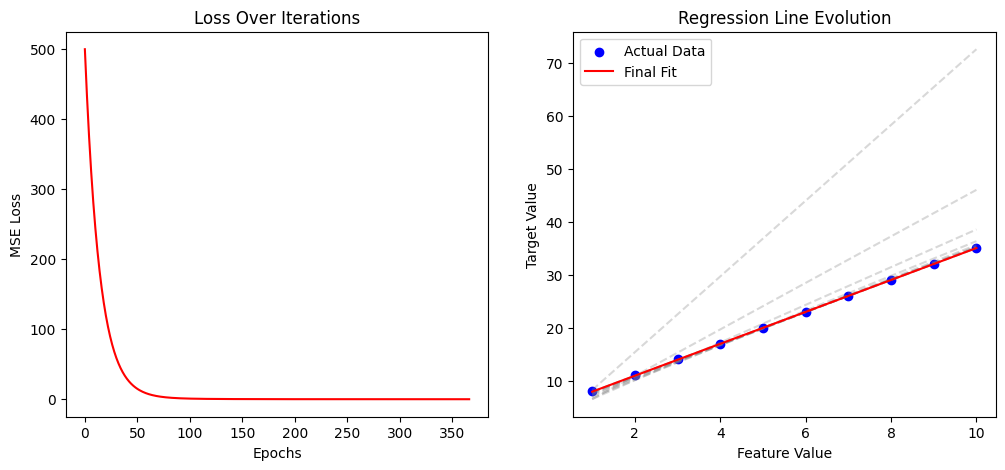

In [65]:
#1.3(experiment with tolerance ie if change in gradient is not much)
exp3=LinearRegression(learning_rate=0.025,epochs=1000,tolerance=1e-3)
exp3.fit(X, y)
exp3.visualize_training(X, y)